In [1]:
import pandas as pd
import numpy as np
movies = pd.read_csv('fandango_score_comparison.csv')
import matplotlib.pyplot as plt
%matplotlib inline


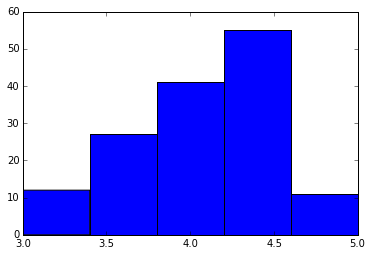

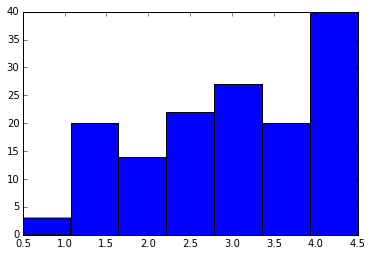

In [2]:
plt.hist(movies['Fandango_Stars'],bins=5)
plt.show()
plt.hist(movies['Metacritic_norm_round'], bins=7)
plt.show()


The two rating systems have resulted in markedly different score distributions. Fandango's system has resulted in a relatively small range of scores, just between 3-5 while metacritic's system spans themost of the range, from 0.5 - 4.5 stars. 

Additionally, both datasets appear to be skewed left.

In [3]:
fandango_mean = movies['Fandango_Stars'].mean()
metacritic_mean = movies['Metacritic_norm_round'].mean()
fandango_median = movies['Fandango_Stars'].median()
metacritic_median = movies['Metacritic_norm_round'].median()
fandango_stdev = movies['Fandango_Stars'].std()
metacritic_stdev = movies['Metacritic_norm_round'].std()
print(fandango_mean,metacritic_mean,fandango_median,metacritic_median,fandango_stdev,metacritic_stdev)

4.08904109589 2.97260273973 4.0 3.0 0.540385977979 0.990960561374


Fandango's process seems to be solely based on fan votes, which will bias the answers due to the purpose fandango serves as a ticket seller. Metacritic scales critical reviews and normalizes them on a scale of 0-100. Metacritic's system attempts to mitigate the chance of high scores, which explains why the median is below the mean. Fandango has almost no low scores, which explains how its median is higher than the mean. 

Regarding standard deviation, metacritic's scores fall on a significantly larger range than fandango's, and are more uniformly distributed. This is cause for a metacritic's larger standard deviation.

In [6]:
movies['fm_diff'] = np.absolute(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies.sort('fm_diff',ascending=False,inplace=True)

In [7]:
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3


In [8]:
import scipy.stats as st
mc,fd = movies['Metacritic_norm_round'], movies['Fandango_Stars']
rval = st.pearsonr(mc,fd)
print(rval)

(0.17844919073895918, 0.031161516228523815)


This low correlation coefficient (the first value) indicates to me that the people who review movies on fandango are not the same people who review movies on MetaCritic

In [9]:
slope,intercept,rval,pval,stderr = st.linregress(mc,fd)
fd3_prediction = slope* 3.0 + intercept
print(fd3_prediction)


4.09170715282


In [11]:
fd4_prediction = slope * 4.0 + intercept
print(fd4_prediction)

4.1890182308


ValueError: x and y must have same first dimension

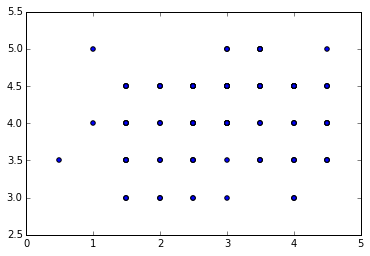

In [15]:
plt.scatter(mc,fd)
x=[0.0,5.0]
plt.plot(x, slope * x + intercept)
plt.show()